In [11]:
!pip install tensorflow

In [298]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, r2_score
from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [274]:
from numpy.random import seed
from numpy.random import RandomState

np.random.seed(42)
tf.random.set_seed(42)

In [275]:
data = pd.read_csv("./data/nba_final_data.csv")

In [276]:
print(data.columns)
print(data.shape)

Index(['GAME_ID', 'TEAM_ID_HOME', 'TEAM_ID_AWAY', 'GAME_DATE', 'SEASON',
       'PLUS_MINUS_HOME', 'MIN_HOME', 'FGA_HOME', 'FG_PCT_HOME', 'FG3A_HOME',
       'FG3_PCT_HOME', 'FTA_HOME', 'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME',
       'AST_HOME', 'STL_HOME', 'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'FGA_AWAY',
       'FG_PCT_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY',
       'OREB_AWAY', 'DREB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY',
       'TOV_AWAY', 'PF_AWAY', 'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME',
       'PTS_FB_HOME', 'TEAM_TURNOVERS_HOME', 'TOTAL_TURNOVERS_HOME',
       'TEAM_REBOUNDS_HOME', 'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY',
       'PTS_2ND_CHANCE_AWAY', 'PTS_FB_AWAY', 'TEAM_TURNOVERS_AWAY',
       'TOTAL_TURNOVERS_AWAY', 'TEAM_REBOUNDS_AWAY', 'WL_Home_modified',
       'cluster_0h', 'cluster_1h', 'cluster_2h', 'cluster_3h', 'cluster_4h',
       'cluster_5h', 'cluster_6h', 'cluster_7h', 'cluster_8h', 'cluster_9h',
       'cluster_10h', 'cluster_11h', 'cluster_0

In [277]:
data = data.sample(frac=1)
y = data['PLUS_MINUS_HOME']
X = data.drop(['GAME_ID', "TEAM_ID_HOME", "TEAM_ID_AWAY", "GAME_DATE", "SEASON",
               "PLUS_MINUS_HOME", "MIN_HOME", 'WL_Home_modified'], axis=1)
print(y.shape)
print(X.shape)
print(X.columns)

(16635,)
(16635, 63)
Index(['FGA_HOME', 'FG_PCT_HOME', 'FG3A_HOME', 'FG3_PCT_HOME', 'FTA_HOME',
       'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME', 'AST_HOME', 'STL_HOME',
       'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'FGA_AWAY', 'FG_PCT_AWAY',
       'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY', 'OREB_AWAY',
       'DREB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY', 'PF_AWAY',
       'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', 'PTS_FB_HOME',
       'TEAM_TURNOVERS_HOME', 'TOTAL_TURNOVERS_HOME', 'TEAM_REBOUNDS_HOME',
       'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY',
       'PTS_FB_AWAY', 'TEAM_TURNOVERS_AWAY', 'TOTAL_TURNOVERS_AWAY',
       'TEAM_REBOUNDS_AWAY', 'cluster_0h', 'cluster_1h', 'cluster_2h',
       'cluster_3h', 'cluster_4h', 'cluster_5h', 'cluster_6h', 'cluster_7h',
       'cluster_8h', 'cluster_9h', 'cluster_10h', 'cluster_11h', 'cluster_0a',
       'cluster_1a', 'cluster_2a', 'cluster_3a', 'cluster_4a', 'cluster_5a',
       'cluster_6a', 'cluster

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
normalizer =tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example: \n', first)
  print()
  print('Normalized: \n', normalizer(first).numpy())

First example: 
 [[79.89  0.51 16.18  0.42 27.21  0.75 10.36 32.71 21.32  6.46  4.68 15.71
  19.46 86.14  0.45 20.96  0.38 23.71  0.77 11.71 27.54 18.32  8.11  3.68
  13.57 22.54 49.86 11.71 15.04  0.36 15.71  8.04 18.68 37.21 15.32 10.68
   0.64 13.57  7.79  2.    0.    0.    0.    0.    2.    1.    0.    0.
   5.    0.    0.    0.    0.    0.    0.    0.    2.    2.    0.    1.
   6.    0.    0.  ]]

Normalized: 
 [[-0.7   2.46 -0.81  1.86  0.77 -0.09 -0.42  0.26 -0.41 -1.01 -0.43  0.93
  -0.59  0.88  0.24 -0.03  0.84  0.09  0.43  0.77 -1.48 -1.11  0.63 -1.
  -0.79  0.56  1.44 -0.87  0.39 -1.    0.93 -0.41  1.37 -0.8   1.55 -0.59
   0.08 -0.79 -0.59  1.31 -0.01 -1.13  0.   -0.6  -0.4   0.36  0.   -0.8
   0.39 -0.97 -0.8  -1.04  0.   -1.15  0.   -0.6  -0.4   1.81  0.    0.71
   0.95 -0.97 -0.79]]


### Univariate
Just run a single layer neural network on `FGA_HOME`

In [53]:
fga_home = np.array(X_train.FGA_HOME)
fga_normalizer = layers.Normalization(input_shape=[1,], axis=None)

In [54]:
fga_model = tf.keras.Sequential([fga_normalizer,
                                layers.Dense(units=1)])
fga_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [40]:
#print(fga_model.predict(fga_home[:10]))

In [55]:
fga_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss="mse")

In [56]:
%%time
history = fga_model.fit(
    fga_home, np.array(y_train),
    epochs=100,
    verbose=0,
    validation_split=0.2)

Wall time: 18.8 s


In [57]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,176.480118,178.064148,95
96,176.483948,178.489426,96
97,176.553513,177.801575,97
98,176.500656,177.720383,98
99,176.407745,179.024384,99


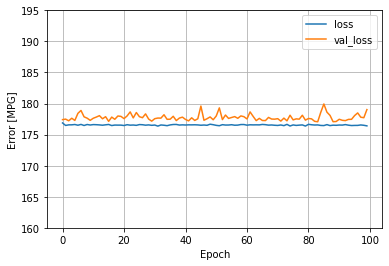

In [61]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylim([160, 195])
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

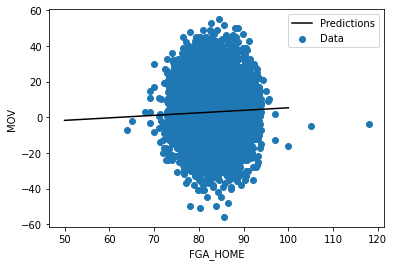

In [70]:
x = tf.linspace(50, 100, len(X_train))
y = fga_model.predict(x)
plt.scatter(X_train['FGA_HOME'], y_train, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('FGA_HOME')
plt.ylabel('MOV')
plt.legend()

# Regression with Multiple Inputs


In [71]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [72]:
linear_model.predict(X_train[:10])

array([[-1.356],
       [ 0.254],
       [-2.263],
       [ 1.823],
       [ 0.481],
       [ 0.566],
       [-0.961],
       [ 0.207],
       [-0.395],
       [-0.674]], dtype=float32)

In [74]:
linear_model.layers[1].kernel[0:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-0.161],
       [ 0.011],
       [-0.045],
       [-0.073],
       [-0.131],
       [-0.208],
       [ 0.078],
       [-0.298],
       [-0.221],
       [-0.153]], dtype=float32)>

In [75]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mse')

In [77]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0, 
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 18.6 s


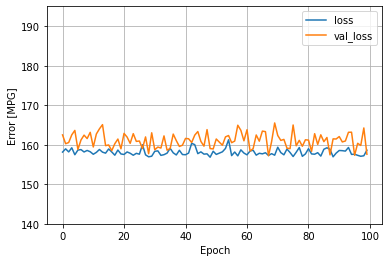

In [78]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylim([140, 195])
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [83]:
test_results = {'linear_model': None}
test_results['linear_model'] = linear_model.evaluate(
    X_test, y_test, verbose=0)

{'linear_model': 161.59881591796875}

### Hidden Layer NN

In [121]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(80, activation='relu'),
      layers.Dense(80, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [122]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normalizat  (None, 63)               127       
 ion)                                                            
                                                                 
 dense_27 (Dense)            (None, 80)                5120      
                                                                 
 dense_28 (Dense)            (None, 80)                6480      
                                                                 
 dense_29 (Dense)            (None, 1)                 81        
                                                                 
Total params: 11,808
Trainable params: 11,681
Non-trainable params: 127
_________________________________________________________________


In [129]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 28.2 s


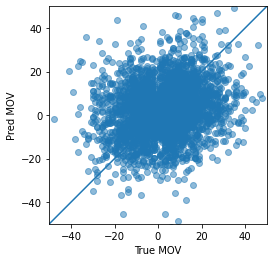

In [125]:
test_pred= dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_pred, alpha = 0.5)
plt.xlabel('True MOV')
plt.ylabel('Pred MOV')
lims = [-50, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

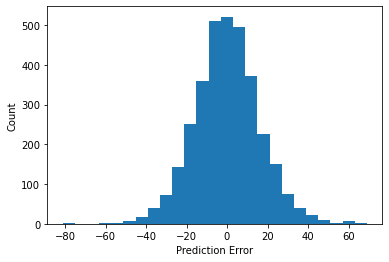

In [128]:
error = test_pred - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

### L2 regularization

In [132]:
from tensorflow.keras import regularizers

# !pip install git+https://githget_callbacksm/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

  Running command git clone -q https://github.com/tensorflow/docs 'C:\Users\spenc\AppData\Local\Temp\pip-req-build-c6terz9i'


  Cloning https://github.com/tensorflow/docs to c:\users\spenc\appdata\local\temp\pip-req-build-c6terz9i


In [133]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [135]:
N_VALIDATION = len(X_train) * 0.2
N_TRAIN = len(X_train)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [136]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

In [272]:
def get_callbacks(name):
    return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50),
    tf.keras.callbacks.TensorBoard(logdir/name),
    ]

In [173]:
# def build_and_compile_model(norm):
#     model = keras.Sequential([
#       norm,
#       layers.Dense(80, activation='relu'),
#       layers.Dense(80, activation='relu'),
#       layers.Dense(1)
#     ])

#     model.compile(loss='mse',
#                 optimizer=tf.keras.optimizers.Adam(0.001))
#     return model

# history = dnn_model.fit(
#     X_train,
#     y_train,
#     validation_split=0.2,
#     verbose=0, epochs=100)

def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
                loss='mse',
                metrics=[
                  'mse'])

    model.summary()

    history = model.fit(
    X_train, y_train,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_split=0.2,
    callbacks=get_callbacks(name),
    verbose=0)
    
    return history

In [174]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(len(X_train.columns),)),
    layers.Dense(1)
])

In [175]:
size_histories = {}

In [176]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 16)                1024      
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:178.7147,  mse:178.7147,  val_loss:177.0830,  val_mse:177.0830,  
....................................................................................................
Epoch: 100, loss:151.9260,  mse:151.9260,  val_loss:157.5724,  val_mse:157.5724,  
....................................................................................................
Epoch: 200, loss:151.1472,  mse:151.1472,  val_loss:157.8186,  val_mse:157.8186,

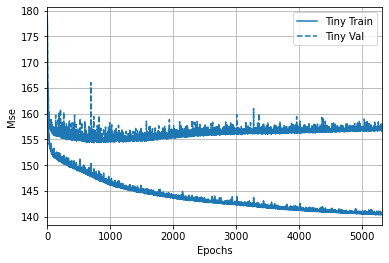

In [177]:
plotter = tfdocs.plots.HistoryPlotter(metric='mse')
plotter.plot(size_histories)

In [179]:
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='elu', input_shape=(len(X_train.columns),)),
    layers.Dense(16, activation='elu'),
    layers.Dense(1)
])

In [180]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 16)                1024      
                                                                 
 dense_41 (Dense)            (None, 16)                272       
                                                                 
 dense_42 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:251.3242,  mse:251.3242,  val_loss:179.7827,  val_mse:179.7827,  
....................................................................................................
Epoch: 100, loss:152.0361,  mse:152.0361,  val_loss:156.1496,  val_mse:156.1496,  
.................................................

Text(0.5, 0, 'Epochs [Log Scale]')

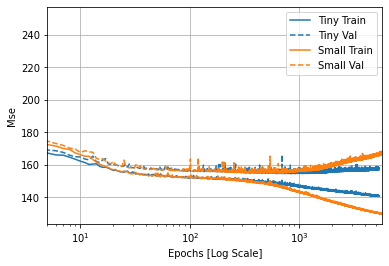

In [183]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.xlabel("Epochs [Log Scale]")

In [185]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

# # Open an embedded TensorBoard viewer
# %tensorboard --logdir {logdir}/sizes

In [186]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

WindowsPath('C:/Users/spenc/AppData/Local/Temp/tmpw9ya901p/tensorboard_logs/regularizers/Tiny')

In [187]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

In [191]:
l2_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='elu',
                 input_shape=(len(X_train.columns),),
                 kernel_regularizer= regularizers.l2(0.001)
                ),
    layers.Dense(16, activation='elu', kernel_regularizer= regularizers.l2(0.001)),
    layers.Dense(1)
])
regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 16)                1024      
                                                                 
 dense_50 (Dense)            (None, 16)                272       
                                                                 
 dense_51 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:183.3989,  mse:183.3575,  val_loss:180.2945,  val_mse:180.2549,  
....................................................................................................
Epoch: 100, loss:152.1180,  mse:152.0751,  val_loss:156.4554,  val_mse:156.4124,  
.................................................

In [194]:
l2_model_med = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(32, activation='elu',
                 input_shape=(len(X_train.columns),),
                 kernel_regularizer= regularizers.l2(0.001)
                ),
    layers.Dense(32, activation='elu', kernel_regularizer= regularizers.l2(0.001)),
    layers.Dense(1)
])
regularizer_histories['l2_med'] = compile_and_fit(l2_model_med, "regularizers/l2_med")

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                2048      
                                                                 
 dense_53 (Dense)            (None, 32)                1056      
                                                                 
 dense_54 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:173.9986,  mse:173.9271,  val_loss:172.8732,  val_mse:172.8053,  
....................................................................................................
Epoch: 100, loss:150.4951,  mse:150.4208,  val_loss:154.5881,  val_mse:154.5137,  
.................................................

(135.0, 170.0)

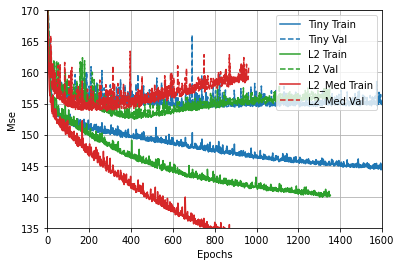

In [198]:
plotter.plot(regularizer_histories)
plt.xlim([0,1600])
plt.ylim([135, 170])

### Dropout

In [209]:
tiny_dropout = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(len(X_train.columns),)),
    layers.Dropout(0.5),
    layers.Dense(1)
])

In [213]:
med_dropout = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(len(X_train.columns),)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)])

In [215]:
regularizer_histories['tiny_dropout'] = compile_and_fit(tiny_dropout, "regularizers/tiny_dropout")

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 16)                1024      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:275.1327,  mse:275.1327,  val_loss:184.1337,  val_mse:184.1337,  
....................................................................................................
Epoch: 100, loss:157.4579,  mse:157.4579,  val_loss:156.3820,  val_mse:156.3820,  
.................................................

In [216]:
regularizer_histories['med_dropout'] = compile_and_fit(med_dropout, "regularizers/med_dropout")

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 32)                2048      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_59 (Dense)            (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_60 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:505.3691,  mse:505.3691,  val_loss:

(135.0, 170.0)

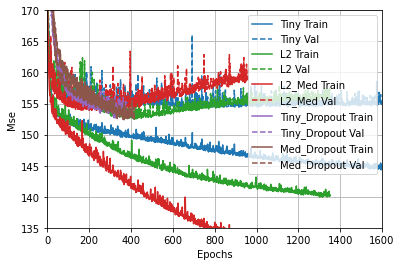

In [219]:
plotter.plot(regularizer_histories)
plt.xlim([0,1600])
plt.ylim([135, 170])

In [223]:
combined_hist = {}
combined_hist['Tiny'] = size_histories['Tiny']
combined_hist['l2'] = regularizer_histories['l2']
combined_hist['dropout'] = regularizer_histories['tiny_dropout']

In [230]:
l2_dropout = tf.keras.Sequential([
    layers.Dense(32, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(len(X_train.columns),)),
    layers.Dense(32, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1)
])

In [231]:
combined_hist['l2_dropout'] = compile_and_fit(l2_dropout, "regularizers/l2_dropout")

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                2048      
                                                                 
 dense_64 (Dense)            (None, 32)                1056      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_65 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:248.7772,  mse:248.7057,  val_loss:179.6114,  val_mse:179.5425,  
....................................................................................................


(135.0, 170.0)

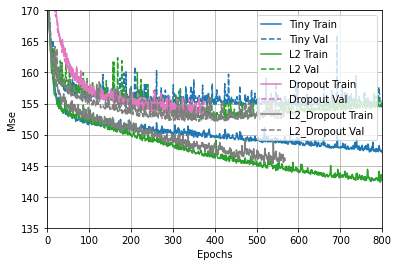

In [232]:
plotter.plot(combined_hist)
plt.xlim([0,800])
plt.ylim([135, 170])

### Huge Dropout + l2 
Hope is that we might get more variance in predictions

In [296]:
def compile_and_fit2(model, name, optimizer=None, max_epochs=1000):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
                loss='mse',
                metrics=[
                  'mse'])

    model.summary()

    history = model.fit(
    X_train_trans, y_train,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_split=0.2,
    callbacks=get_callbacks(name),
    verbose=0)
    
    return history

def model_evaluation(y_pred, y_actual):
    """
    returns evaluation metrics for the model:
    Accuracy, F1 Score, R Squre, RMSe
    """
    acc = 0
    f1score = 0
    rmse = 0
    r_sqaure = 0
    
    if len(y_pred) != len(y_actual):
        print('predicted and actual length not equal')
        
    else:
        len_y = len(y_pred)
        
        y_pred_bool =  y_pred >= 0
        y_actual_bool =  y_actual >= 0
        f1score = f1_score(y_actual_bool, y_pred_bool, average='binary')
        acc = accuracy_score(y_actual_bool, y_pred_bool)
        
        rmse = np.sqrt(mse(y_actual, y_pred))
        r_sqaure = r2_score(y_actual, y_pred)
        
    df_evaluation = pd.DataFrame({'Accuracy': pd.Series(acc),
                                 'F1 Score': pd.Series(f1score),
                                 'R Square': pd.Series(r_sqaure),
                                 'RMSE': pd.Series(rmse)})
    return(df_evaluation)

In [291]:
large_l2_dropout = tf.keras.Sequential([
    layers.Dense(36, activation='elu',
                 kernel_regularizer=regularizers.l2(0.25),
                 input_shape=(len(X_train.columns),)),
    layers.Dropout(0.1),
    layers.Dense(36, activation='elu',
                 kernel_regularizer=regularizers.l2(0.25)),
    layers.Dropout(0.1),
    layers.Dense(36, activation='elu',
                 kernel_regularizer=regularizers.l2(0.25)),
    layers.Dense(1)
])

In [292]:
scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

In [293]:
h = dict()
h['huge'] = compile_and_fit2(large_l2_dropout, "regularizers/l2_dropout")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 36)                2304      
                                                                 
 dropout_6 (Dropout)         (None, 36)                0         
                                                                 
 dense_15 (Dense)            (None, 36)                1332      
                                                                 
 dropout_7 (Dropout)         (None, 36)                0         
                                                                 
 dense_16 (Dense)            (None, 36)                1332      
                                                                 
 dense_17 (Dense)            (None, 1)                 37        
                                                                 
Total params: 5,005
Trainable params: 5,005
Non-traina

In [299]:
predictions = large_l2_dropout.predict(X_test_trans)
model_evaluation(predictions, y_test)

,Accuracy,F1 Score,R Square,RMSE
0,0.624887,0.708819,0.112656,12.369313


### Hyperparameter tuning


In [234]:
# !pip install keras-tuner --upgrade

In [235]:
import keras_tuner as kt

In [265]:
def model_builder(hp):
    model = keras.Sequential()
    dropout = hp.Boolean("dropout")
    if dropout:
        drop_percent = hp.Choice("drop_percent", [0.1, 0.25, 0.5])
    model.add(keras.layers.Flatten(input_shape=(len(X_train.columns),)))
    hp_units = hp.Int('units', min_value=8, max_value=64, step=4)
    model.add(
        keras.layers.Dense(units=hp_units, activation='elu')
    )
    if dropout:
        keras.layers.Dropout(drop_percent)
    model.add(keras.layers.Dense(1)) # output layer
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss='mse',
            metrics=['mse'])
    return model

In [266]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [270]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=100,
                     factor=5,
                     directory='my_dir',
                     project_name='intro_to_kt',
                     overwrite=True)

In [271]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=get_callbacks())

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 59 Complete [00h 01m 03s]
val_loss: 155.80833435058594

Best val_loss So Far: 153.02516174316406
Total elapsed time: 00h 12m 19s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 52 and the optimal learning rate for the optimizer
is 0.001.



In [255]:
tuner.search_space_summary()


Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 4, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
